In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score

In [2]:
dataset = pd.read_csv('titanic.csv')

In [3]:
dataset.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [4]:
income_set = set(dataset['Sex'])
dataset['Sex'] = dataset['Sex'].map({'female': 0, 'male': 1}).astype(int)
print(dataset.head)

<bound method NDFrame.head of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name  Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    1  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...    0  38.0      1   
2                               Heikkinen, Miss. Laina    0  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)    0  35.0      1   
4                             Allen, Mr. William Henry    1  35.0      0   
..                                                 ...  .

In [5]:
X = dataset.drop('Survived',axis='columns')
X

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,NaN,S
887,888,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,B42,S
888,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.0000,C148,C


In [6]:
Y = dataset.Survived
Y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [7]:
X.columns[X.isna().any()]

Index(['Age', 'Cabin', 'Embarked'], dtype='object')

In [8]:
X.Age = X.Age.fillna(X.Age.mean())

In [9]:
X.columns[X.isna().any()]

Index(['Cabin', 'Embarked'], dtype='object')

In [10]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)
len(X_train)
len(Y_train)

712

In [13]:

from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder

# Initialize the model
model = GaussianNB()

# If you need to transform categorical columns
label_encoder = LabelEncoder()

# Loop through all object columns in X_test to transform them using LabelEncoder
for col in X_test.select_dtypes(include=['object']).columns:
    X_test[col] = label_encoder.fit_transform(X_test[col])

# Fit the model using X_train and Y_train
model.fit(X_train, Y_train)


GaussianNB()

In [14]:

model.score(X_train, Y_train)*100, model.score(X_test, Y_test)*100


(78.51123595505618, 54.18994413407822)

Test accuracy = 0.5418994413407822


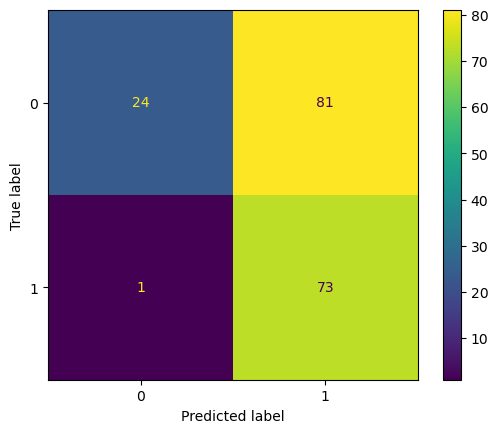

In [15]:
Y_pred = model.predict(X_test)

print(f"Test accuracy = {accuracy_score(Y_test, Y_pred)}")

cm = confusion_matrix(Y_test, Y_pred)
dcm = ConfusionMatrixDisplay(cm, display_labels=model.classes_)
dcm.plot()
plt.show()

In [16]:
df = pd.read_csv('diabetes.csv')

In [17]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [18]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [44]:
df = pd.DataFrame({
    'feature1': [1, 2, 3, 4, 5, 6],
    'feature2': [7, 8, 9, 10, 11, 12],
    'target': [0, 1, 0, 1, 0, 1]
})

X = df.drop(columns=['target'])
y = df['target']

In [45]:
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=42)

In [46]:
print(f"xtrain shape = {xtrain.shape}")
print(f"xtest shape = {xtest.shape}")
xtrain

xtrain shape = (4, 2)
xtest shape = (2, 2)


,feature1,feature2
5,6,12
2,3,9
4,5,11
3,4,10


In [43]:
nb = GaussianNB()
nb.fit(xtrain, ytrain)

GaussianNB()

In [49]:
ypred = nb.predict(xtest)

Test accuracy = 0.5


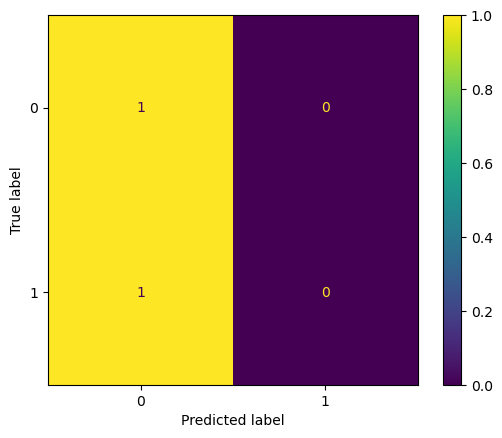

In [50]:
print(f"Test accuracy = {accuracy_score(ytest, ypred)}")
cm = confusion_matrix(ytest, ypred)
dcm = ConfusionMatrixDisplay(cm, display_labels=nb.classes_)
dcm.plot()
plt.show()